### Import

In [12]:
from urllib import request
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import tensorflow as tf
from keras.layers import Rescaling

from tqdm import tqdm

### Get class names

- Download file

In [13]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2022-12-23 14:17:17--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt.1’

mini_classes.txt.1  100%[===================>]     760  --.-KB/s    in 0s      

2022-12-23 14:17:17 (74,4 MB/s) - ‘mini_classes.txt.1’ saved [760/760]



- Read file

In [14]:
f = open("mini_classes.txt","r")
classes = f.readlines()
f.close()

In [15]:
classes

['drums\n',
 'sun\n',
 'laptop\n',
 'anvil\n',
 'baseball_bat\n',
 'ladder\n',
 'eyeglasses\n',
 'grapes\n',
 'book\n',
 'dumbbell\n',
 'traffic_light\n',
 'wristwatch\n',
 'wheel\n',
 'shovel\n',
 'bread\n',
 'table\n',
 'tennis_racquet\n',
 'cloud\n',
 'chair\n',
 'headphones\n',
 'face\n',
 'eye\n',
 'airplane\n',
 'snake\n',
 'lollipop\n',
 'power_outlet\n',
 'pants\n',
 'mushroom\n',
 'star\n',
 'sword\n',
 'clock\n',
 'hot_dog\n',
 'syringe\n',
 'stop_sign\n',
 'mountain\n',
 'smiley_face\n',
 'apple\n',
 'bed\n',
 'shorts\n',
 'broom\n',
 'diving_board\n',
 'flower\n',
 'spider\n',
 'cell_phone\n',
 'car\n',
 'camera\n',
 'tree\n',
 'square\n',
 'moon\n',
 'radio\n',
 'hat\n',
 'pizza\n',
 'axe\n',
 'door\n',
 'tent\n',
 'umbrella\n',
 'line\n',
 'cup\n',
 'fan\n',
 'triangle\n',
 'basketball\n',
 'pillow\n',
 'scissors\n',
 't-shirt\n',
 'tooth\n',
 'alarm_clock\n',
 'paper_clip\n',
 'spoon\n',
 'microphone\n',
 'candle\n',
 'pencil\n',
 'envelope\n',
 'saw\n',
 'frying_pan\n',

### Create a list of classes
- convert `\n` to blank
- convert space to `_`

In [16]:
classes_name = [name.replace('\n','').replace(' ','_') for name in classes]
classes_name

['drums',
 'sun',
 'laptop',
 'anvil',
 'baseball_bat',
 'ladder',
 'eyeglasses',
 'grapes',
 'book',
 'dumbbell',
 'traffic_light',
 'wristwatch',
 'wheel',
 'shovel',
 'bread',
 'table',
 'tennis_racquet',
 'cloud',
 'chair',
 'headphones',
 'face',
 'eye',
 'airplane',
 'snake',
 'lollipop',
 'power_outlet',
 'pants',
 'mushroom',
 'star',
 'sword',
 'clock',
 'hot_dog',
 'syringe',
 'stop_sign',
 'mountain',
 'smiley_face',
 'apple',
 'bed',
 'shorts',
 'broom',
 'diving_board',
 'flower',
 'spider',
 'cell_phone',
 'car',
 'camera',
 'tree',
 'square',
 'moon',
 'radio',
 'hat',
 'pizza',
 'axe',
 'door',
 'tent',
 'umbrella',
 'line',
 'cup',
 'fan',
 'triangle',
 'basketball',
 'pillow',
 'scissors',
 't-shirt',
 'tooth',
 'alarm_clock',
 'paper_clip',
 'spoon',
 'microphone',
 'candle',
 'pencil',
 'envelope',
 'saw',
 'frying_pan',
 'screwdriver',
 'helmet',
 'bridge',
 'light_bulb',
 'ceiling_fan',
 'key',
 'donut',
 'bird',
 'circle',
 'beard',
 'coffee_cup',
 'butterfly',
 

### Download the Dataset on Google Storage 
- Create a Folder for store data
- Download each class with google storage path

In [17]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [18]:
def download():
    dataset_url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for name in classes_name:
        ### Create path of class       
        classe_url = name.replace('_', '%20')
        path = dataset_url + classe_url + '.npy'
        print(path)
        ### download path to data folder
        request.urlretrieve(path, 'data/'+ name + '.npy')

In [19]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy


KeyboardInterrupt: 

### Decompress all imag in `npy` file
- Create list of all `file.npy`
- Initialize `X` and `y`
- recover imited sample per class
- unvectorize data
- Create Labels
- Get CLass name (`human readable`)

In [ ]:
def load_data(folder="data", max_sample_per_classes=4000):
    
    files_path = glob.glob(os.path.join(folder, '*.npy'))
    
    #initialize variables 
    X = np.empty([0, 28, 28])
    y = np.empty([0])
    class_names = []
    
    for index, file in enumerate(tqdm(files_path)):
        data = np.load(file)
        data = data[ : max_sample_per_classes, :]
        unvectorized_data = data.reshape(data.shape[0], 28, 28)
        labels = np.full(unvectorized_data.shape[0], index)
        
        X = np.concatenate((X, unvectorized_data), axis=0)
        y = np.concatenate((y, labels), axis=0)
        
        ### Recover file name without suffix
        class_name, _ = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)
    
    return (X, y, class_names)

In [ ]:
X, y, classes_names = load_data(folder="data",
                                max_sample_per_classes=4000)

100%|██████████| 100/100 [00:53<00:00,  1.85it/s]


### Split and Suffle Dataset 
- **`Create`** a radom index permutation
- **`Permutate`** `X` and `Y` same
- **`Get`** index for Ratio of Split 
- **`Indexing`** Train and Test set 

In [ ]:
def split_and_suffle_dataset(X, y, train_size=0.9):
    
    #### Suffle dataset
    permutation = np.random.permutation(y.shape[0])
    
    X = X[permutation, :]
    y = y[permutation]
    
    y = tf.cast(y, tf.int32)
    #### Split dataset
    index = int(len(X)*train_size)
    X_train = X[ : index, : ]
    X_test = X[index : , :]
    
    y_train = y[: index]
    y_test = y[index :]
    
    return (X_train, y_train, X_test, y_test)

In [ ]:
X_train, y_train, X_test, y_test = split_and_suffle_dataset(X, y, train_size=0.9)

2022-12-23 00:12:33.043216: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-12-23 00:12:33.043273: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: manjaro
2022-12-23 00:12:33.043281: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: manjaro
2022-12-23 00:12:33.043426: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.60.11
2022-12-23 00:12:33.043440: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.60.11
2022-12-23 00:12:33.043443: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.60.11
2022-12-23 00:12:33.043717: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical o

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((360000, 28, 28),
 TensorShape([360000]),
 (40000, 28, 28),
 TensorShape([40000]))

### Normalizing Data

In [ ]:
Rescalor = Rescaling(1./255)


X_train = Rescalor(X_train)
X_test = Rescalor(X_test)

2022-12-23 00:12:52.629877: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2257920000 exceeds 10% of free system memory.
2022-12-23 00:12:53.389401: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1128960000 exceeds 10% of free system memory.
2022-12-23 00:12:53.690286: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1128960000 exceeds 10% of free system memory.
2022-12-23 00:12:53.955572: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1128960000 exceeds 10% of free system memory.


### Visualize some Random Data

In [ ]:
import random

def plot_random_img(data, labels, class_names, number):

    plt.figure(figsize=(10, 10))
    for i in range(number):

        ax = plt.subplot(int(number/2), int(number/2), i+1)
        index = random.choice(range(len(data)))
        plt.imshow(data[index], cmap=plt.cm.binary)
        plt.title(class_names[int(labels[index])])
        plt.axis(False)

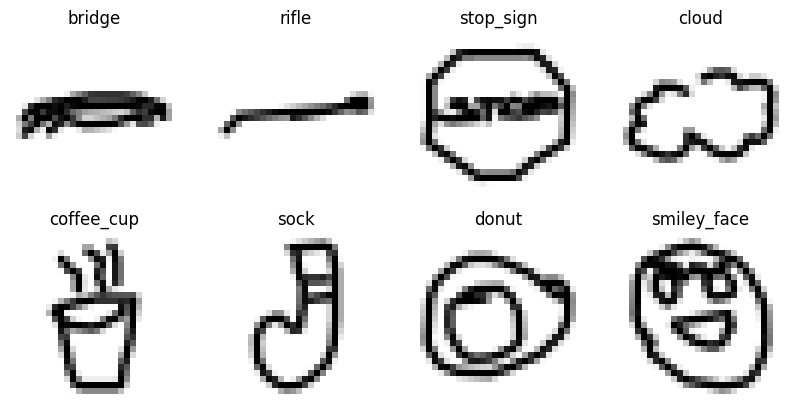

In [ ]:
plot_random_img(data=X_train,
                labels=y_train,
                class_names=classes_names,
                number=8)

### Save Dataset and Labels

In [ ]:
# reshaping the array from 3D
# matrice to 2D matrice.
train_set_compressed = np.reshape(X_train, (X_train.shape[0], -1))
test_set_compressed = np.reshape(X_test, (X_test.shape[0], -1))

np.savetxt("train_set.txt", train_set_compressed)
np.savetxt("test_set.txt", test_set_compressed)
np.savetxt("train_labels.txt", y_train)
np.savetxt("test_labels.txt", y_test)
np.savetxt("class_names.txt", classes_names, delimiter=" ", fmt="%s")


### Load Datasets and Labels

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
X_test = np.loadtxt("test_set.txt")
X_train = np.loadtxt("train_set.txt")
y_test = np.loadtxt("test_labels.txt")
y_train = np.loadtxt("train_labels.txt")

In [23]:
my_file = open("class_names.txt", "r")
data = my_file.read()
classes_name = data.split("\n")
my_file.close()

In [24]:
X_test = np.reshape(X_test, 
                        (X_test.shape[0], X_test.shape[1] // 28, 28, 1)
                    )

X_train = np.reshape(X_train, 
                        (X_train.shape[0], X_train.shape[1] // 28, 28, 1)
                    )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((360000, 28, 28, 1), (360000,), (40000, 28, 28, 1), (40000,))

### Create Model 

In [5]:
from keras import Sequential
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import Adam

from keras.losses import SparseCategoricalCrossentropy

#### Best accuracy and loss
loss: `0.2319` - accuracy: `0.9327`
```python
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Conv2D(64, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(nbr_class, activation="softmax")
    ]
)
```

In [10]:
nbr_class = len(classes_name)

In [17]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Conv2D(64, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(nbr_class, activation="softmax")
    ]
)

model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

for l in model.layers:
    print(l.output_shape)
    

(None, 28, 28, 32)
(None, 14, 14, 32)
(None, 14, 14, 64)
(None, 7, 7, 64)
(None, 3136)
(None, 128)
(None, 100)


In [18]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    verbose=1,
                    batch_size=32)

Epoch 1/100
11250/11250 [==============================] - 21s 2ms/step - loss: 1.3199 - accuracy: 0.6719
Epoch 2/100
11250/11250 [==============================] - 23s 2ms/step - loss: 0.9095 - accuracy: 0.7683
Epoch 3/100
11250/11250 [==============================] - 23s 2ms/step - loss: 0.8057 - accuracy: 0.7926
Epoch 4/100
11250/11250 [==============================] - 22s 2ms/step - loss: 0.7413 - accuracy: 0.8076
Epoch 5/100
11250/11250 [==============================] - 22s 2ms/step - loss: 0.6955 - accuracy: 0.8187
Epoch 6/100
11250/11250 [==============================] - 22s 2ms/step - loss: 0.6579 - accuracy: 0.8271
Epoch 7/100
11250/11250 [==============================] - 22s 2ms/step - loss: 0.6281 - accuracy: 0.8339
Epoch 8/100
11250/11250 [==============================] - 23s 2ms/step - loss: 0.6002 - accuracy: 0.8397
Epoch 9/100
11250/11250 [==============================] - 23s 2ms/step - loss: 0.5773 - accuracy: 0.8449
Epoch 10/100
11250/11250 [====================

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss on the Test set : {loss}")
print(f"Accuracy on the Test set : {(accuracy*100):.2f}%")

1250/1250 [==============================] - 1s 968us/step - loss: 3.9507 - accuracy: 0.7145
Loss on the Test set : 3.950748920440674
Accuracy on the Test set : 71.45%


In [33]:
model.save("best_model")

2022-12-23 21:04:31.307068: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model/assets


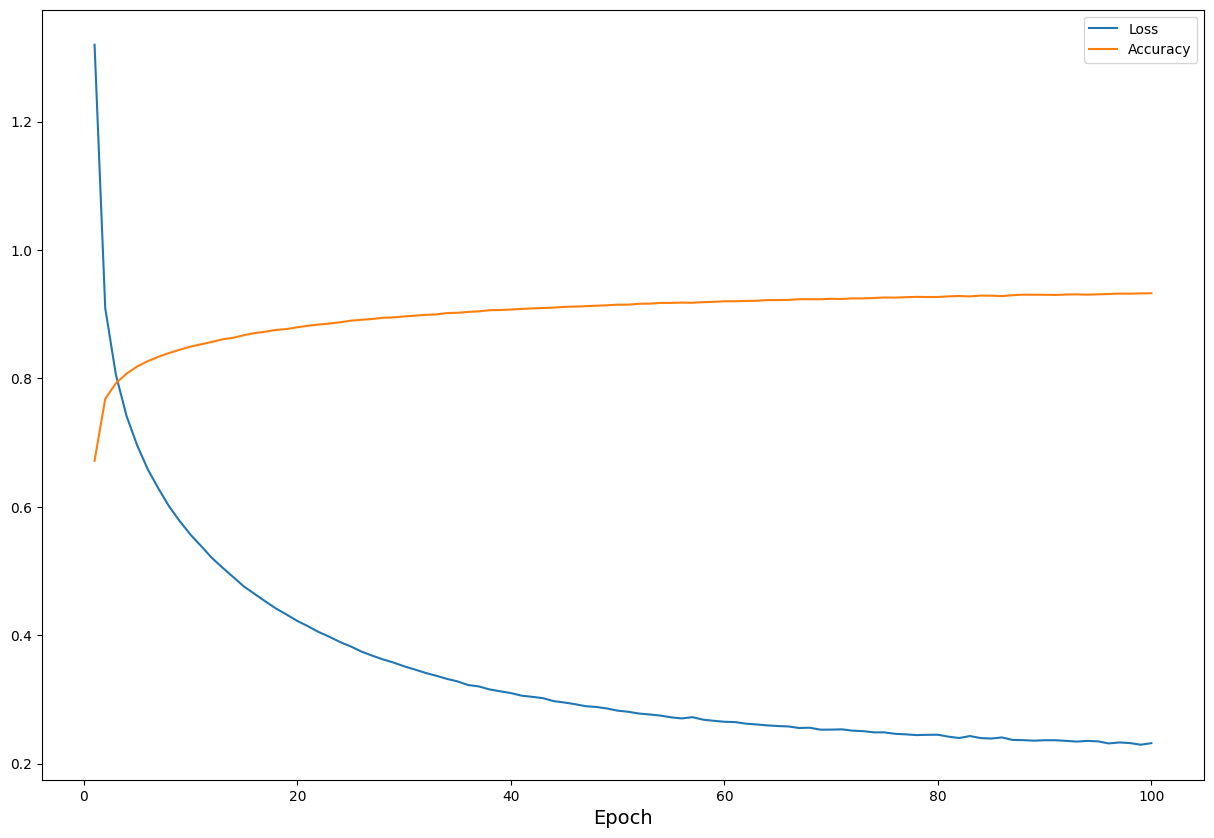

In [19]:
history = pd.DataFrame(history.history)

plt.figure(figsize=(15, 10))

plt.plot(
    np.arange(1, len(history)+1), 
    history['loss'], 
    label='Loss'
)
plt.plot(
    np.arange(1, len(history)+1), 
    history['accuracy'], 
    label='Accuracy'
)
plt.xlabel('Epoch', size=14)
plt.legend();

### Create Processor for image Prediction 

In [2]:
from keras.layers import Layer
from keras.layers import Rescaling, Resizing

In [5]:
class Image_Processing(Layer):
    
    def __init__(self, height=28, width=28, color=1):
        self.height = height
        self.width = width
        self.color = color
        self.Rescalor = Rescaling(1./255)
        self.Resizing = Resizing(28, 28)
        
    def __call__(self, img):
        img = Resizing(img)
        img = Rescaling(img)
        return (img)

In [6]:
Processor = Image_Processing()

### Test Prediction

In [17]:
from keras.models import load_model
import random

In [18]:
model = load_model("best_model")

2022-12-24 16:02:42.796029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 16:02:42.815775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 16:02:42.815913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 16:02:42.816617: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [27]:
def plot_random_prediction(model, X_test, y_test, classes):

    ## Choose a random index
    index = random.randint(0, len(X_test))

    ## Get image, labels and Prediction of this index
    image = X_test[index]
    data = tf.expand_dims(image, axis=0)
    y_probability = model.predict(data)
    argmax_index = y_probability.argmax()
    y_pred = classes[argmax_index]
    y_true = classes[int(y_test[index])]

    ## Plot the Image
    plt.imshow(image, cmap=plt.cm.binary)

    ## Change color if the prediction is Right or Wrong
    if (y_pred == y_true):
        color = "green"
    else :
        color = "red"

    ### Add Information 
    probability = 100*(tf.reduce_max(y_probability))
    text = f"Pred: {y_pred} {probability:2.0f}% (True : {y_true})"
    plt.title(text, color=color, size=12)
    plt.axis(False)

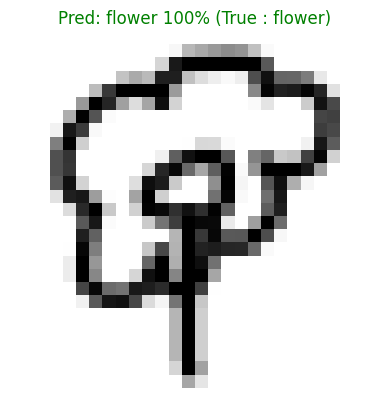

In [59]:
plot_random_prediction(model, X_test, y_test, classes_name)

### Plot Confusion Matrix

In [53]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes), # create enough axis slots for each class
          yticks=np.arange(n_classes), 
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

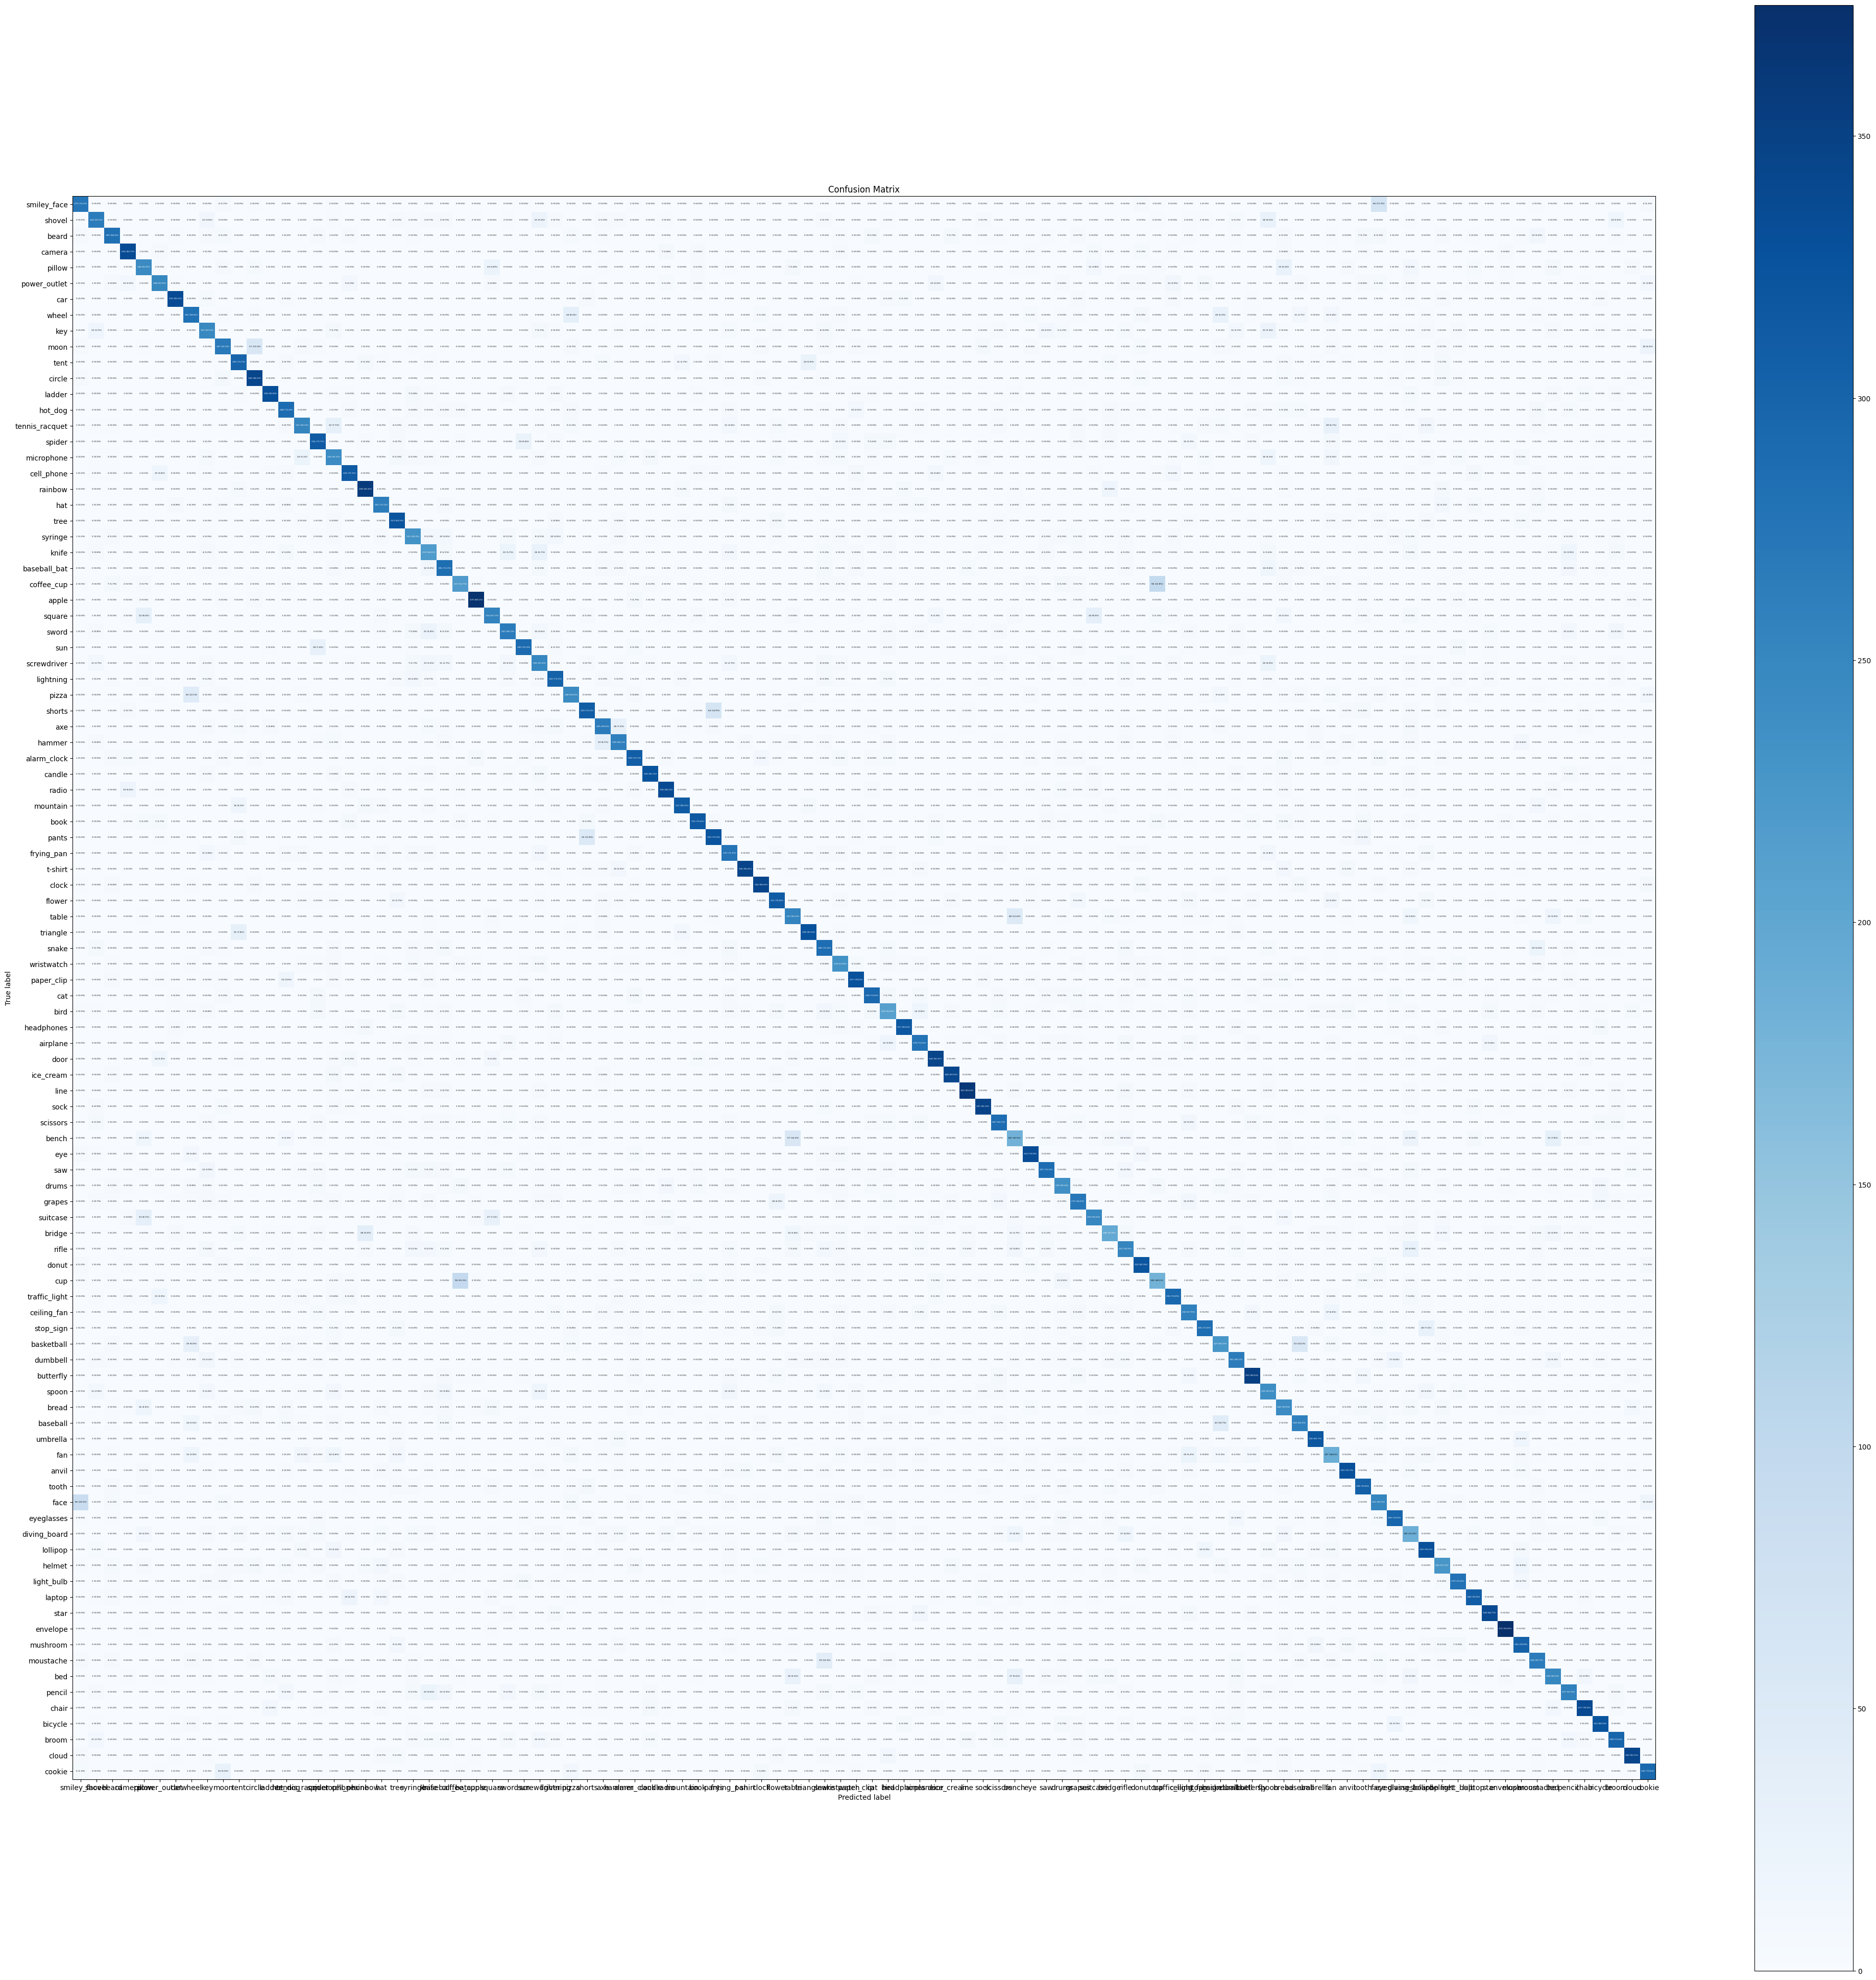

In [58]:
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis=1)


make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=classes_name,
                      figsize=(50, 50), 
                      text_size=3)